# Natural orbital interaction picture (NOIP)

## Free fermions

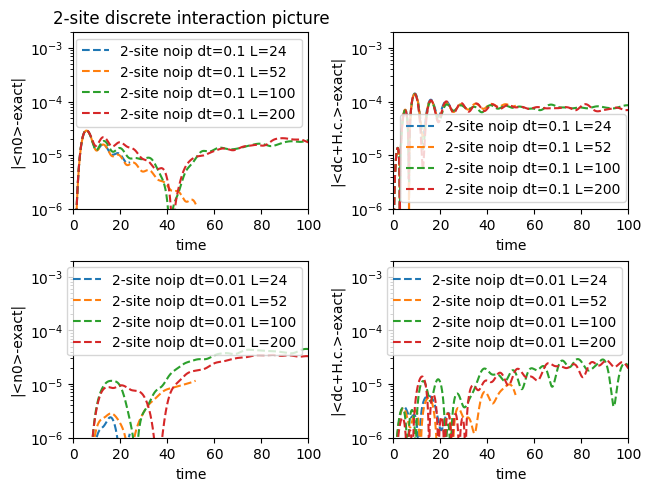

In [11]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

fig, axs = plt.subplot_mosaic([['a','b'],['c','d']], constrained_layout=True)

c=0
lab="abcd"
for dt in [0.1, 0.01]:
    for col,ylab in [[4,'n0'], [5,'dc+H.c.']]:
        ax=axs[lab[c]]
        ax.set_xlabel("time")
        ax.set_ylabel(f'|<{ylab}>-exact|')
        ax.set_yscale("log")
        if lab[c]=='a': ax.set_title('2-site discrete interaction picture')
        for L in [24,52,100,200]: 
            lt='-'
            n00=np.loadtxt(f"data/dt{dt}/free/free_L{L}.txt", skiprows=1)
            #plt.plot(n0[:,0],[abs(x-0.5) for x in n0[:,4]], lt, label=f"dt={dt} L={L}")
            #plt.plot(n0[:,0],[abs(x-cdRef) for x in n0[:,5]], lt, label=f"dt={dt} L={L}")
        
        
            lt='--'
            if dt==0.1: cdt=0.1
            else: cdt=0.1
            n0=np.loadtxt(f"data/noip/ipc_U0.0_dt{dt}_cdt{cdt}_cnImp2/L{L}/irlm_no_L{L}.txt", skiprows=1)
            #plt.plot(n0[:,0],[abs(x-0.5) for x in n0[:,4]], lt, label=f"dt={dt} L={L}")
            ti=min(len(n0),len(n00))
            ax.plot(n0[:,0],[abs(x) for x in n0[:ti,col]-n00[:ti,col]], lt, label=f"2-site noip dt={dt} L={L}")
            
            
        
        ax.set_xlim(0,100)
        ax.set_ylim(1e-6,2e-3)
        ax.legend()
        c=c+1

## Interacting case

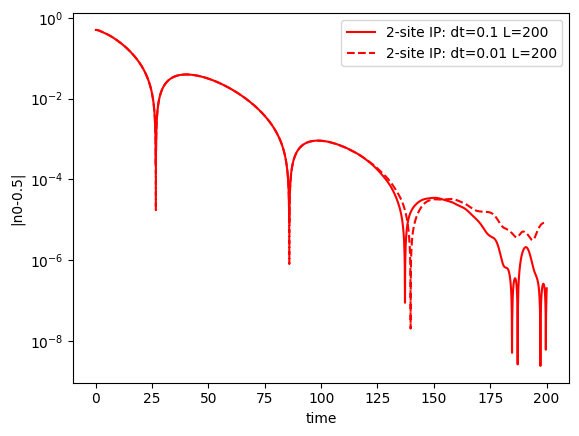

In [24]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

plt.ylabel("|n0-0.5|")
plt.xlabel("time")
plt.yscale("log")

lt='-'
for dt in [0.1,0.01]:
    for L in [200]:
        n0=np.loadtxt(f"data/noip/ipc_U0.25_dt{dt}_cdt0.1_cnImp2/L{L}/irlm_no_L{L}.txt", skiprows=1)
        #n0old=np.loadtxt(f"data/dt{dt}/tdvp_no8/L{L}/irlm_no_L{L}.txt", skiprows=1)
        #n0gs2=np.loadtxt(f"data/noip/ipa_U0.25_dt{dt}_cdt0.1_cnImp-1/L{L}/irlm_no_L{L}.txt", skiprows=1)
        #plt.plot(n0old[:,0],[abs(x-0.5) for x in n0old[:,4]], label=f"old: dt={dt} L={L}", color="green")
        #plt.plot(n0gs2[:,0],[abs(x-0.5) for x in n0gs2[:,4]], label=f"gs2 as imp, active IP: dt={dt} L={L}", color="blue")
        plt.plot(n0[:,0],[abs(x-0.5) for x in n0[:,4]],lt, label=f"2-site IP: dt={dt} L={L}", color="red") 
        lt='--'
plt.legend(loc="upper right")

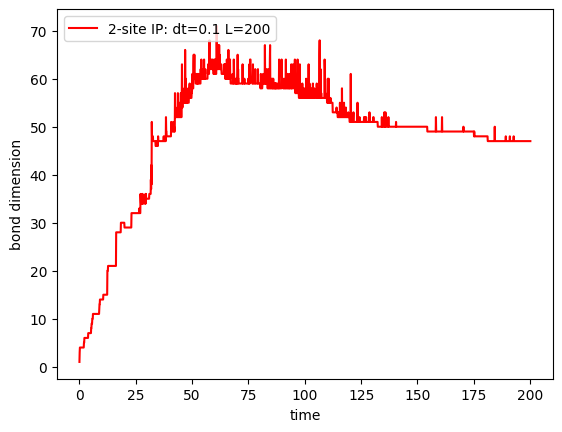

In [21]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

plt.ylabel("bond dimension")
plt.xlabel("time")

dt=0.1
for L in [200]:
    n0=np.loadtxt(f"data/noip/ipc_U0.25_dt{dt}_cdt0.1_cnImp2/L{L}/irlm_no_L{L}.txt", skiprows=1)
    #n0old=np.loadtxt(f"data/dt{dt}/tdvp_no8/L{L}/irlm_no_L{L}.txt", skiprows=1)
    #n0gs2=np.loadtxt(f"data/noip/ipa_U0.25_dt{dt}_cdt0.1_cnImp-1/L{L}/irlm_no_L{L}.txt", skiprows=1)
    #plt.plot(n0old[:,0],n0old[:,2], label=f"old: dt={dt} L={L}", color="green")
    #plt.plot(n0gs2[:,0],n0gs2[:,2], label=f"gs2 as imp, active IP: dt={dt} L={L}", color="blue")
    plt.plot(n0[:,0],n0[:,2], label=f"2-site IP: dt={dt} L={L}", color="red")    
plt.legend(loc="upper left")

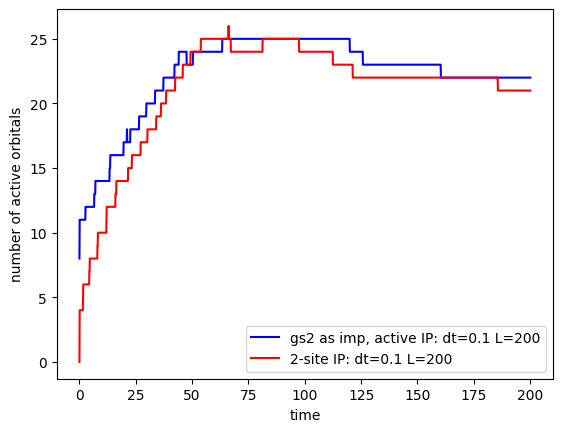

In [20]:
plt.ylabel("number of active orbitals")
plt.xlabel("time")

dt=0.1
for L in [200]:
    n0=np.loadtxt(f"data/noip/ipc_U0.25_dt{dt}_cdt0.1_cnImp2/L{L}/irlm_no_L{L}.txt", skiprows=1)
    n0gs2=np.loadtxt(f"data/noip/ipa_U0.25_dt{dt}_cdt0.1_cnImp-1/L{L}/irlm_no_L{L}.txt", skiprows=1)
    plt.plot(n0gs2[:,0],n0gs2[:,6], label=f"gs2 as imp, active IP: dt={dt} L={L}", color="blue")
    plt.plot(n0[:,0],n0[:,6], label=f"2-site IP: dt={dt} L={L}", color="red")    
plt.legend()